In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scipy as sp
from joblib import dump, load #we can also pickle
import warnings

warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv('tips.csv')

In [70]:
df.head()

,total_bill,tip,price_per_person
0,16.99,1.01,8.49
1,10.34,1.66,3.45
2,21.01,3.50,7.00
3,23.68,3.31,11.84
4,24.59,3.61,6.15


In [71]:
df.shape

(244, 3)

## Multiple Features (N-Dimensional)

C:\Users\test\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


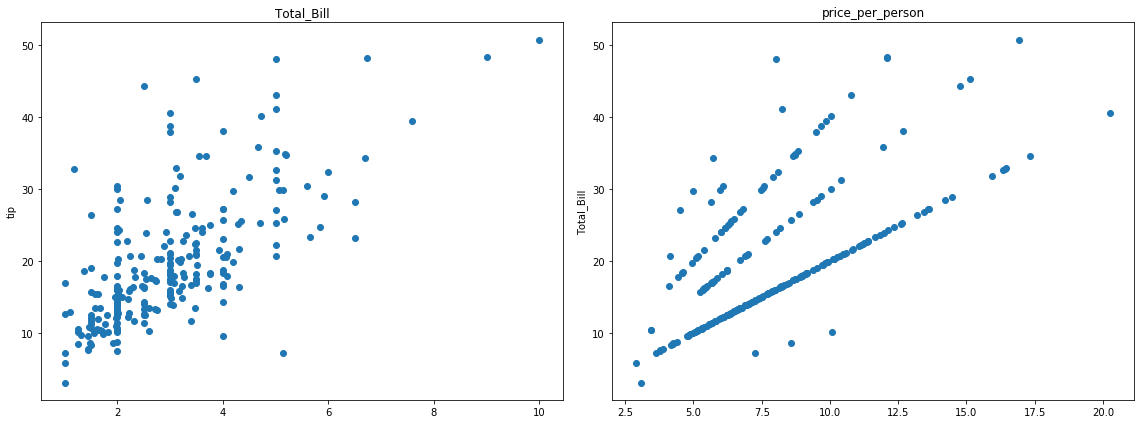

In [72]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].plot(df['tip'],df['total_bill'],'o')
axes[0].set_ylabel("tip")
axes[0].set_title("Total_Bill")

axes[1].plot(df['price_per_person'],df['total_bill'],'o')
axes[1].set_title("price_per_person")
axes[1].set_ylabel("Total_Bill")


plt.tight_layout();

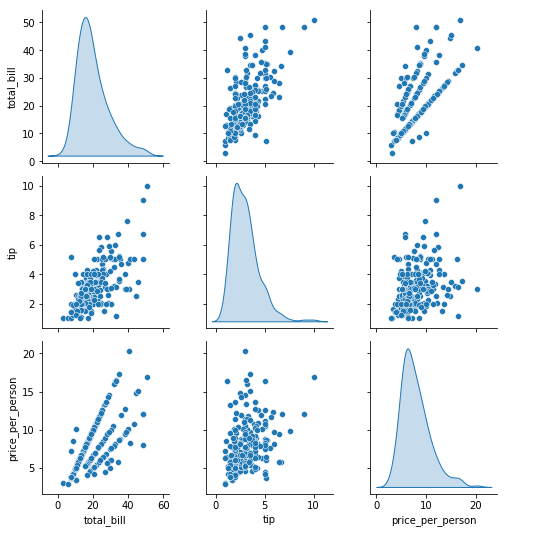

In [73]:
#df.drop(['size','CC Number','sex','smoker','day'],axis=1,inplace=True)
# Relationship Between Feature
sns.pairplot(df,diag_kind='kde')

In [74]:
X=df.drop('total_bill',axis=1)

In [75]:
X.shape

(244, 2)

In [76]:
y=df['total_bill'] #list created

In [77]:
y.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

## SciKit Learn

In [78]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.24,random_state=100)

In [79]:
X_train

,tip,price_per_person
22,2.23,7.88
52,5.20,8.70
156,5.00,8.03
139,2.75,6.58
157,3.75,6.25
...,...,...
87,4.00,9.14
103,3.48,11.21
67,1.00,3.07
24,3.18,9.91


In [80]:
X_test

,tip,price_per_person
65,3.15,6.69
59,6.73,12.07
191,4.19,9.90
111,1.00,7.25
112,4.00,12.69
161,2.50,6.33
150,2.50,7.04
160,3.50,5.38
99,1.50,6.23
83,5.00,16.34


In [81]:
y_train

22     15.77
52     34.81
156    48.17
139    13.16
157    25.00
       ...  
87     18.28
103    22.42
67      3.07
24     19.82
8      15.04
Name: total_bill, Length: 185, dtype: float64

In [82]:
y_test

65     20.08
59     48.27
191    19.81
111     7.25
112    38.07
161    12.66
150    14.07
160    21.50
99     12.46
83     32.68
163    13.81
31     18.35
88     24.71
85     34.83
185    20.69
182    45.35
69     15.01
97     12.03
81     16.66
190    15.69
46     22.23
142    41.19
239    29.03
152    17.26
125    29.80
204    20.53
26     13.37
221    13.42
209    12.76
201    12.74
64     17.59
218     7.74
3      23.68
230    24.01
32     15.06
96     27.28
212    48.33
140    17.47
224    13.42
41     17.46
110    14.00
128    11.38
186    20.90
238    35.83
75     10.51
214    28.17
19     20.65
210    30.06
62     11.02
29     19.65
42     13.94
115    17.31
165    24.52
222     8.58
48     28.55
233    10.77
23     39.42
136    10.33
55     19.49
Name: total_bill, dtype: float64

## Creating a Model 

In [83]:
model=LinearRegression()

In [84]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
model.coef_

array([3.17475192, 1.44162112])

In [86]:
model.intercept_

-1.0902201805265541

## Calculate Performance on Test Set 

In [87]:
test_predections = model.predict(X_test)

In [88]:
test_predections

array([18.55469365, 37.67622715, 26.48403944, 12.53628484, 29.90295948,
       15.9721213 , 16.99567229, 17.77733316, 12.65320726, 38.33962848,
       15.20646937, 13.46370055, 35.30051558, 27.87976719, 20.75185086,
       31.81872284, 16.35716971, 12.35046683, 21.71264026, 14.97421726,
       30.81436626, 26.66249744, 31.65920362, 15.89792151, 19.40859485,
       19.00430384, 14.88931273, 19.63119421, 15.18701933, 14.4741577 ,
       15.73902464,  9.06049631, 26.48700271, 13.90901037, 19.2894426 ,
       31.27249955, 44.89733022, 22.62118011, 13.59916555, 19.55900205,
       18.52538341, 13.46210782, 20.06951074, 30.94882744, 10.4611468 ,
       33.08248961, 19.46355205, 19.70432726, 13.13912098, 22.59075496,
       18.67261989, 22.49143421, 21.73596104, 17.37441269, 19.14225429,
       11.33258675, 37.18878361, 12.69804863, 24.09454875])

In [89]:
MAE=mean_absolute_error(y_test,test_predections)
MSE=mean_squared_error(y_test,test_predections)
RMSE=np.sqrt(MSE)
R_squared=r2_score(y_test,test_predections)

In [90]:
MAE

4.2972364283232976

In [91]:
MSE

30.712068009282117

In [92]:
RMSE

5.541846985372486

In [93]:
R_squared

0.7005919235009318

In [94]:
df['total_bill'].mean()

19.785942622950824

## Plotting Residuals 

In [95]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predections=model.predict(X_test)

In [96]:
test_res=y_test-test_predections

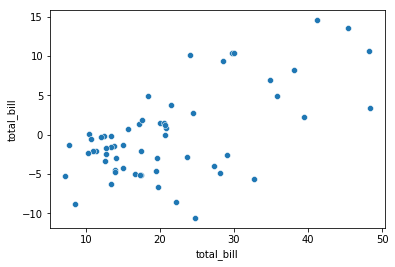

In [97]:
sns.scatterplot(x=y_test,y=test_res)

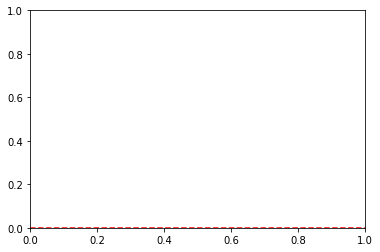

In [98]:
plt.axhline(y=0,color='r',linestyle='--')

In [99]:
len(test_res)

59

C:\Users\test\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


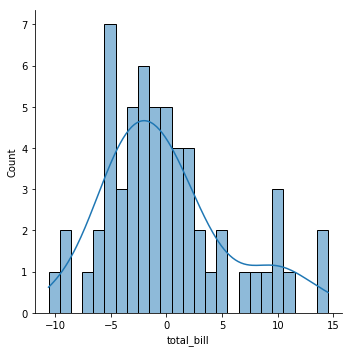

In [100]:
sns.displot(test_res,bins=25,kde=True)

NameError: name 'ax' is not defined

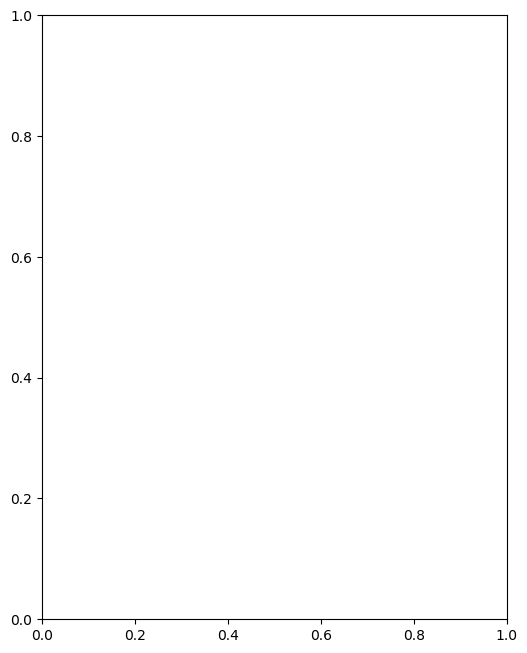

In [101]:
# Create a figure and axis to plot on
a= plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
b = sp.stats.probplot(test_res,plot=ax)

## Retraining Model on Full Data 

In [102]:
final_model= LinearRegression()

In [105]:
final_model.fit(X,y)

LinearRegression()

## Final Model Fit 

In [109]:
y_hat=final_model.predict(X)

C:\Users\test\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\test\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


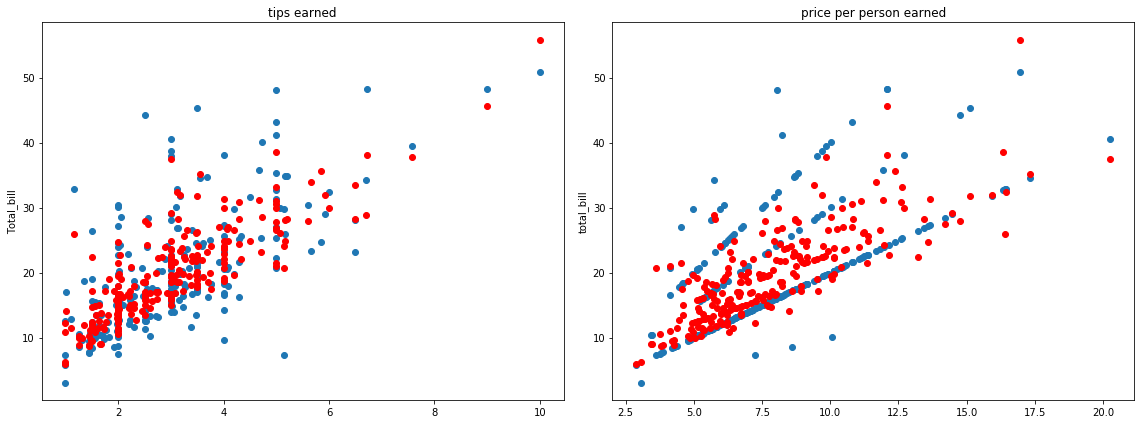

In [116]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].plot(df['tip'],df['total_bill'],'o')
axes[0].plot(df['tip'],y_hat,'o',color='red')
axes[0].set_ylabel("Total_bill")
axes[0].set_title("tips earned")

axes[1].plot(df['price_per_person'],df['total_bill'],'o')
axes[1].plot(df['price_per_person'],y_hat,'o',color='red')
axes[1].set_title("price per person earned")
axes[1].set_ylabel("total_bill")

plt.tight_layout();


## Residuals

In [118]:
residuals = y_hat - y

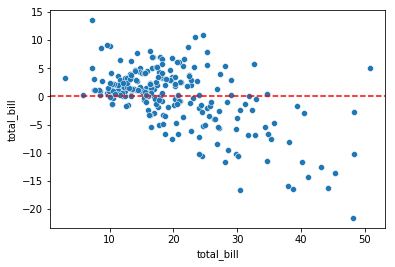

In [119]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0,color='r',linestyle='--')

## Coefficient 

In [120]:
final_model.coef_

array([3.29836623, 1.43410566])

In [121]:
coeff_df=pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])

In [122]:
coeff_df  #coefficient of tips and price per person

,Coefficient
tip,3.298366
price_per_person,1.434106


In [123]:
df.corr()

,total_bill,tip,price_per_person
total_bill,1.000000,0.675734,0.647554
tip,0.675734,1.000000,0.347405
price_per_person,0.647554,0.347405,1.000000


In [124]:
campaign = [[149,22]]

In [125]:
final_model.predict(campaign)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([521.59090648])

## Model Persistance(Saving and Loading) 

In [126]:
dump(final_model,'tips_model.joblib')

['tips_model.joblib']

In [ ]:
loaded_model = load('sales_model.joblib')

In [ ]:
loaded_model.predict(campaign)

In [3]:
df=pd.read_csv('train.csv')

In [5]:
df.head(10)

,Loan_ID,Sex,Marital_Status,No_Dependents,Education_Status,Self_Employed,Income,Coapplicant_Income,Loan_Amount,Tenure,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [11]:
df.isnull().sum()

Loan_ID                0
Sex                   13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [14]:
df[['Credit_History']]=df[['Credit_History']].fillna(df[['Credit_History']].mean())

In [15]:
df['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [16]:
df.isnull().sum()

Loan_ID                0
Sex                   13
Marital_Status         3
No_Dependents         15
Education_Status       0
Self_Employed         32
Income                 0
Coapplicant_Income     0
Loan_Amount           22
Tenure                14
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64